# Dependencies and Definitions

In [1]:
# First we import matplotlib, pandas, and numpy using standard aliases.

#!pip install -U matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Next we load the dataframe.
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

# We then restrict to entries where both "Job created" and "Total Savings" are non-null.
df_filt = df[df['Job created'].notnull()]
df_filt = df_filt[df_filt['Total Savings'].notnull()]

# For convenience, we extract the number of jobs created and the total savings into two 
# numpy arrays we label x and y.
x = df_filt['Job created'].values
y = df_filt['Total Savings'].values

# Scatter Plots

This question asks us to: create a "scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings." Since the dataframe does not contain a column for "Average Savings", I've created scatter plots using the "Total Savings" column. In addition, I made 4 plots, corresponding to normal or logarithmic scales for both the x and y axes. I found the plot where we use logarithmic scales for both the x and y axes to be the cleanest.

First, we make a plot of "Total Savings" vs "Jobs created" using standard axes for both the x and y axis. This plot is difficult to understand due to the large outlier on the x-axis.

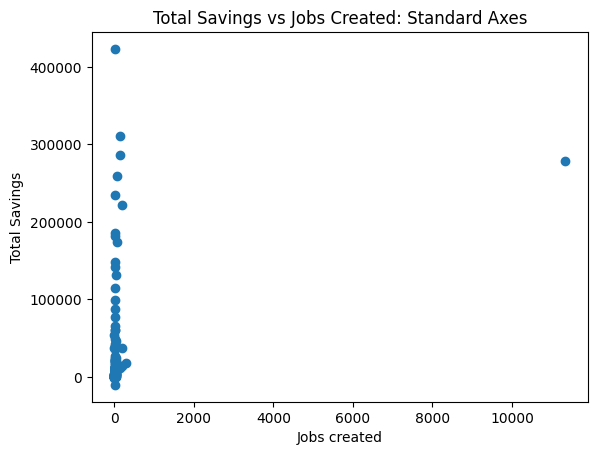

In [2]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Jobs created')
ax.set_ylabel('Total Savings')
#plt.xscale('log')

ax.set_title("Total Savings vs Jobs Created: Standard Axes")
plt.show()

Next, we redo the same plot, but now using a logarithmic scale for the x-axis to better handle outliers. This plot is easier to visualize, but theres still clustering for low values of y and its difficult to distinguish different points there.

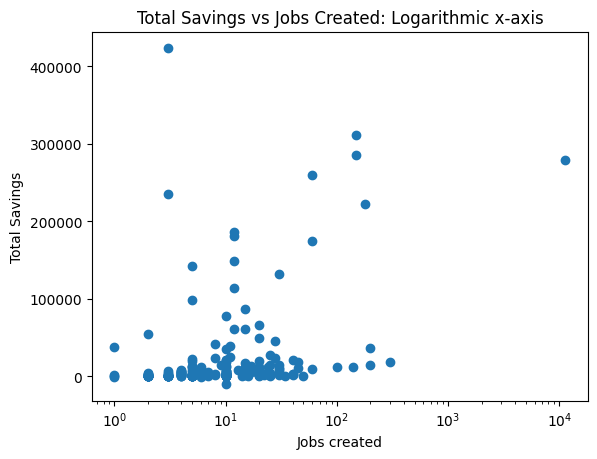

In [3]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Jobs created')
ax.set_ylabel('Total Savings')
plt.xscale('log')

ax.set_title("Total Savings vs Jobs Created: Logarithmic x-axis")
plt.show()

Next, we make a plot where we only use a logarithmic scale for the y axis. This plot is difficult to understand directly due to the large outlier on the x-axis.

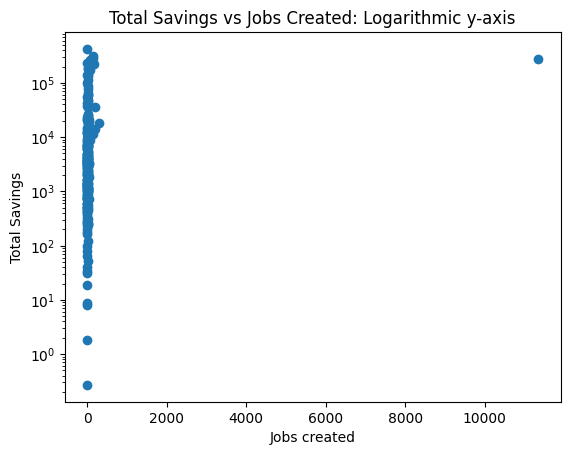

In [4]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Jobs created')
ax.set_ylabel('Total Savings')
plt.yscale('log')

ax.set_title("Total Savings vs Jobs Created: Logarithmic y-axis")
plt.show()

Finally, by using logarithmic scales for both axes we can better visualize and understand the relationship between these two variables.

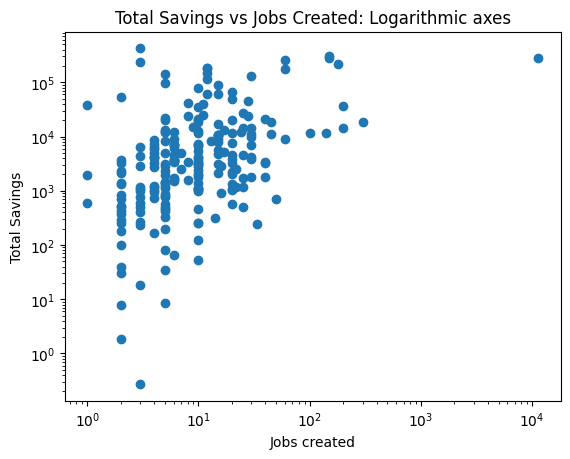

In [5]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Jobs created')
ax.set_ylabel('Total Savings')
plt.xscale('log')
plt.yscale('log')

ax.set_title("Total Savings vs Jobs Created: Logarithmic axes")
plt.show()

# Histograms

This question asked us to create a histogram of the log of the average total savings.

There are two different ways to visualize the log of the average total savings. We can either create a normal histogram, and then use a log scale on the x-axis or we can compute the log of the savings first and then make a histogram. The issue with the second approach is that there are cases where the total savings is negative and the logarithm of a negative number is undefined (technically, it is a complex number). Therefore, for the second approach we filter the "Total Savings" column to only keep positive savings. Although this does entail throwing out outliers, I think the resulting plot is cleaner and easier to understand.

First, we make a histogram for the "Total Savings" and then use a log-scale on the x-axis. The resulting histogram disiplays a notable peak for small values of the total savings. There are also outliers where the savings are very large, but they are difficult to see. 

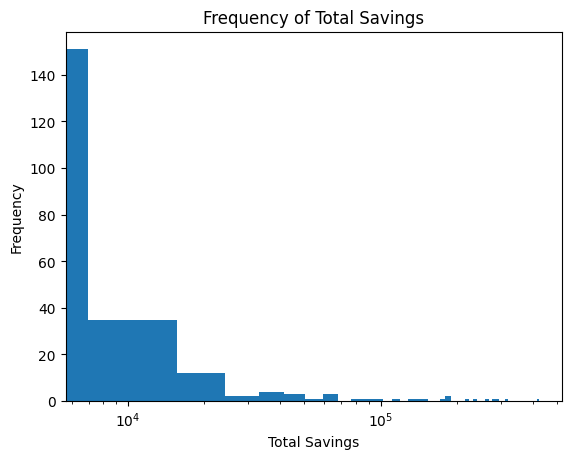

In [6]:
fig, ax = plt.subplots()

ax.hist(y,bins=50)
ax.set_xlabel('Total Savings')
ax.set_ylabel('Frequency')
plt.xscale('log')
plt.title('Frequency of Total Savings')

plt.show()

In the plot below, we restrict our "Total Savings" values to be positive, take their logarithm, and then make a histogram. The resulting plot is easier to visualize and we see a peak when log(savings) is around 8.

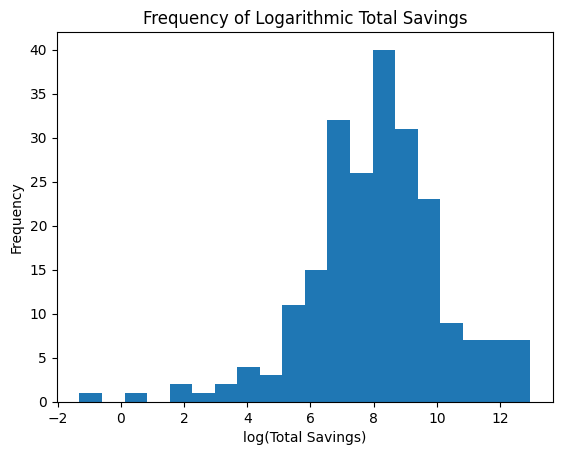

In [7]:
fig, ax = plt.subplots()

y_filt = [el for el in y if el>0]

ax.hist(np.log(y_filt),bins=20)
ax.set_xlabel('log(Total Savings)')
ax.set_ylabel('Frequency')
plt.title('Frequency of Logarithmic Total Savings')

plt.show()

# Line Plot

Finally, in the plot below we create a line plot of jobs created as a function of the month.

In [8]:
# The function below extracts the month from the 'Effective Date' column.
def extract_month(x):
    return x.split('/')[0]

df['month'] = df['Effective Date'].apply(extract_month).astype(int)

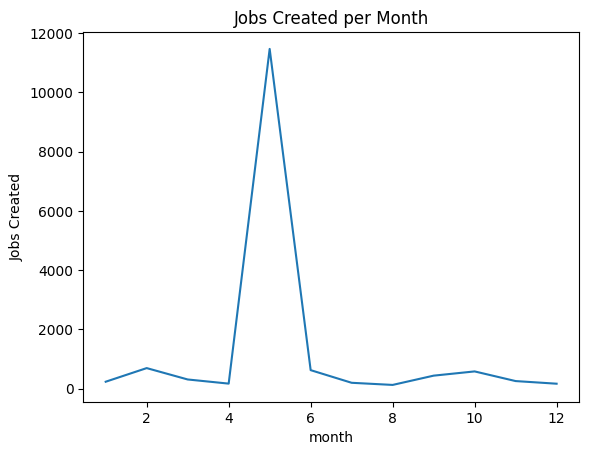

In [9]:
df.groupby('month')['Job created'].sum().plot(ylabel='Jobs Created',
                                             title='Jobs Created per Month');
plt.show()